<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.spatial.distance as spatial

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
datalist = []
placeholder = 'sat_scores.csv'
with open(placeholder) as f:
    data = csv.reader(f)
    for row in data:
        datalist.append(row)
        
header = datalist[0]
data = datalist[1:]
satdict = dict()
for index, heading in enumerate(header):
    satdict[heading] = [row[index] for row in data]
    
print satdict
    
    
        

{'Math': ['510', '513', '515', '505', '516', '499', '499', '506', '500', '501', '499', '510', '499', '489', '501', '488', '474', '526', '499', '527', '499', '515', '510', '517', '525', '515', '542', '439', '539', '512', '542', '553', '542', '589', '550', '545', '572', '589', '580', '554', '568', '561', '577', '562', '596', '550', '570', '603', '582', '599', '551', '514'], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', 

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

## The loaded file has the columns with numeric values converted to int64 already, whereas the Dataframe loaded from the dictionary did not convert the values, and left it as an object instead of an integer.

In [3]:
dfcsv = pd.DataFrame(satdict)
print dfcsv.dtypes

Math      object
Rate      object
State     object
Verbal    object
dtype: object


In [4]:
sat_scores = pd.read_csv(placeholder, encoding='utf8')
print sat_scores.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

### 1.3
The data describes various attributes about SAT scores in States throughout the USA.
* The State column consists of the 2 letter abbreviation of the states.
* The Rate column is possibly the participation rate of the students in the states (ie. the percentage of high school seniors in the state that took the SAT that year.)
* The Verbal column probably represents the average Verbal Score in the SAT for that state.
* The Math column also probably represents the average Math Score in the SAT for that state.

In [5]:
sat_scores.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [6]:
sat_scores.tail(10)

,State,Rate,Verbal,Math
42,MO,8,577,577
43,LA,7,564,562
44,WI,6,584,596
45,AR,6,562,550
46,UT,5,575,570
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551
51,All,45,506,514


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [7]:
sat_scores.drop(51, inplace=True)
sat_scores.tail()

,State,Rate,Verbal,Math
46,UT,5,575,570
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551


In [8]:
sat_scores.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [9]:
sat_scores.shape

(51, 4)

In [10]:
data_dictionary = {'Names':['State','Rate','Verbal','Math'], 'Vartype':['object','int64','int64','int64'],
                   'Description': ['2 letter abbreviation of the states','Participation rate of the students in the states'
                                  'Average Verbal Score in the SAT','Average Math Score in the SAT'],
                   'Shape':[52,4]}








In [11]:
data_dictionary

{'Description': ['2 letter abbreviation of the states',
  'Participation rate of the students in the statesAverage Verbal Score in the SAT',
  'Average Math Score in the SAT'],
 'Names': ['State', 'Rate', 'Verbal', 'Math'],
 'Shape': [52, 4],
 'Vartype': ['object', 'int64', 'int64', 'int64']}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

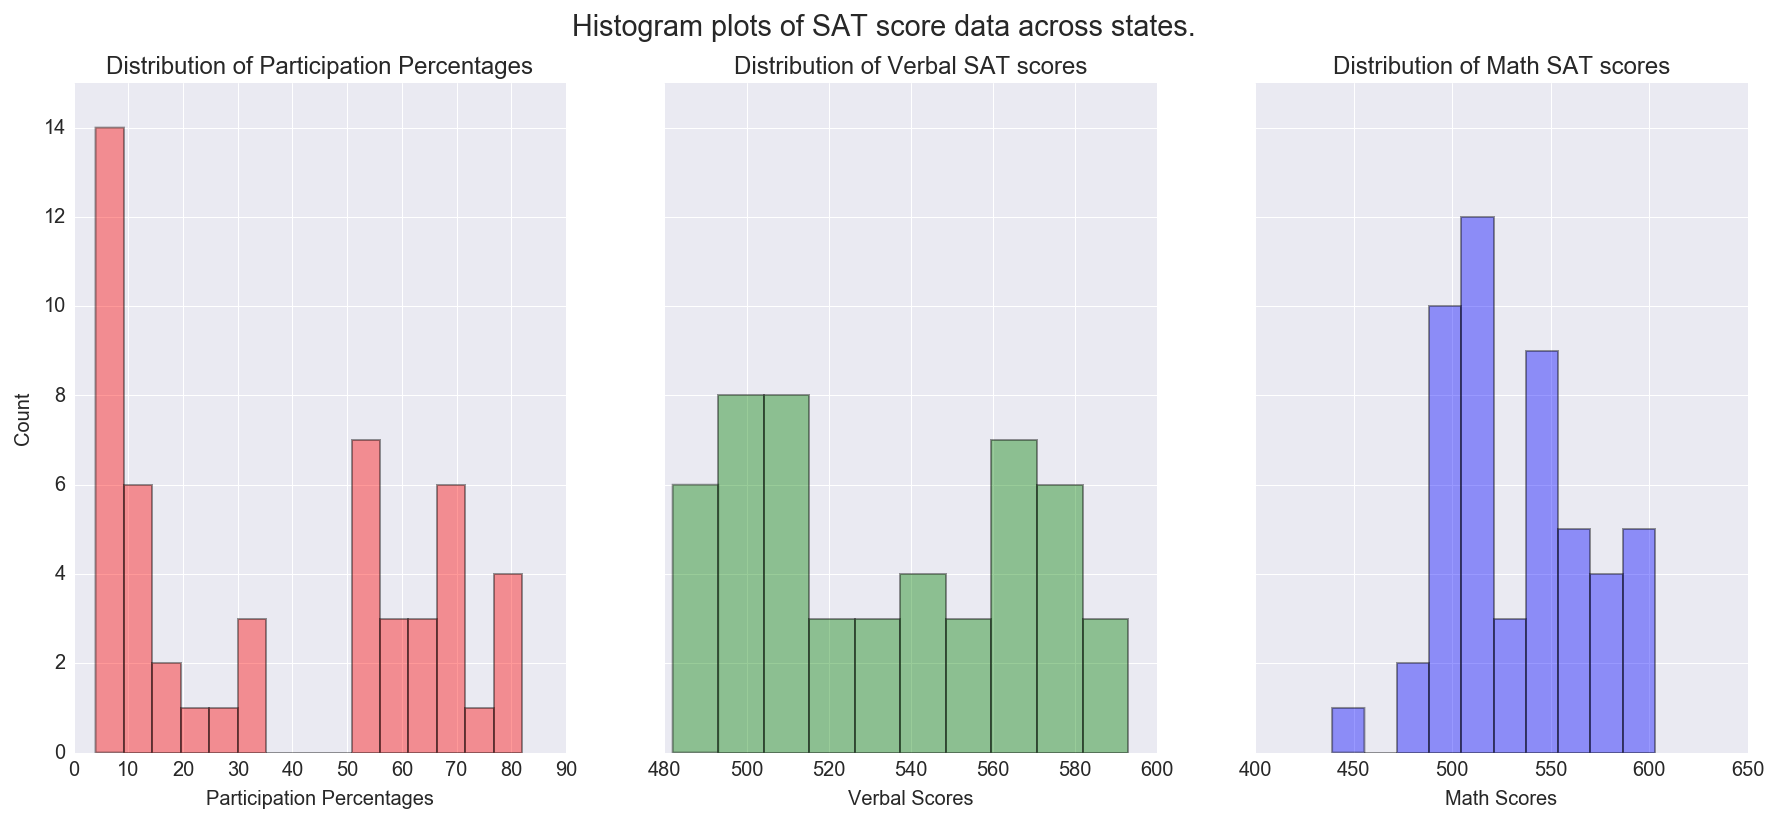

In [12]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(1,3,figsize=(15,6),sharey=True)
fig.suptitle("Histogram plots of SAT score data across states.", fontsize="x-large")

ax[0].set_ylabel("Count") 
plt.ylim(0,15)
sns.distplot(sat_scores.Rate,kde=False, ax=ax[0], bins=15, color='r')
ax[0].set_ylabel("Count") 
ax[0].set_title("Distribution of Participation Percentages")
ax[0].set_xlabel("Participation Percentages")
sns.distplot(sat_scores.Verbal, kde=False, ax=ax[1], bins=10,color='g')
ax[1].set_title("Distribution of Verbal SAT scores")
ax[1].set_xlabel("Verbal Scores") 

sns.distplot(sat_scores.Math, kde=False, ax=ax[2],bins=10,color='b')
ax[2].set_title("Distribution of Math SAT scores")
ax[2].set_xlabel("Math Scores") 

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

### 3.2
The visualization of the pairplots gives a good indication of the correlation between the data. 
* In the diagonal plots, it shows the distribution of each column of the dataset. 
    * The participation rates seem to be very low for a number of states, and more spread out amongst the states with a higher participation rate.
    * The verbal and math scores seem to vary by about a 100 points across the states. The distribution is not that skewed for them.
* The off-diagonal plots highlight the correlation between the columns of the dataset.
* It can be seen that there is quite a strong correlation between performances between Verbal and Math SAT scores through the states.
* There seems to be a negative relationship between SAT participation rates and Verbal/Math scores. As the participation rates increase, the average verbal and math SAT scores would tend to decrease. The gulf between the high and low participation rates come up to a 100 point differential, which is quite significant.
    * A possible inference from this visualisation: The lower participation rates for students would mean that only better students take it, as the ACT scores could be more prevalent in those states with lower rates of participation. 

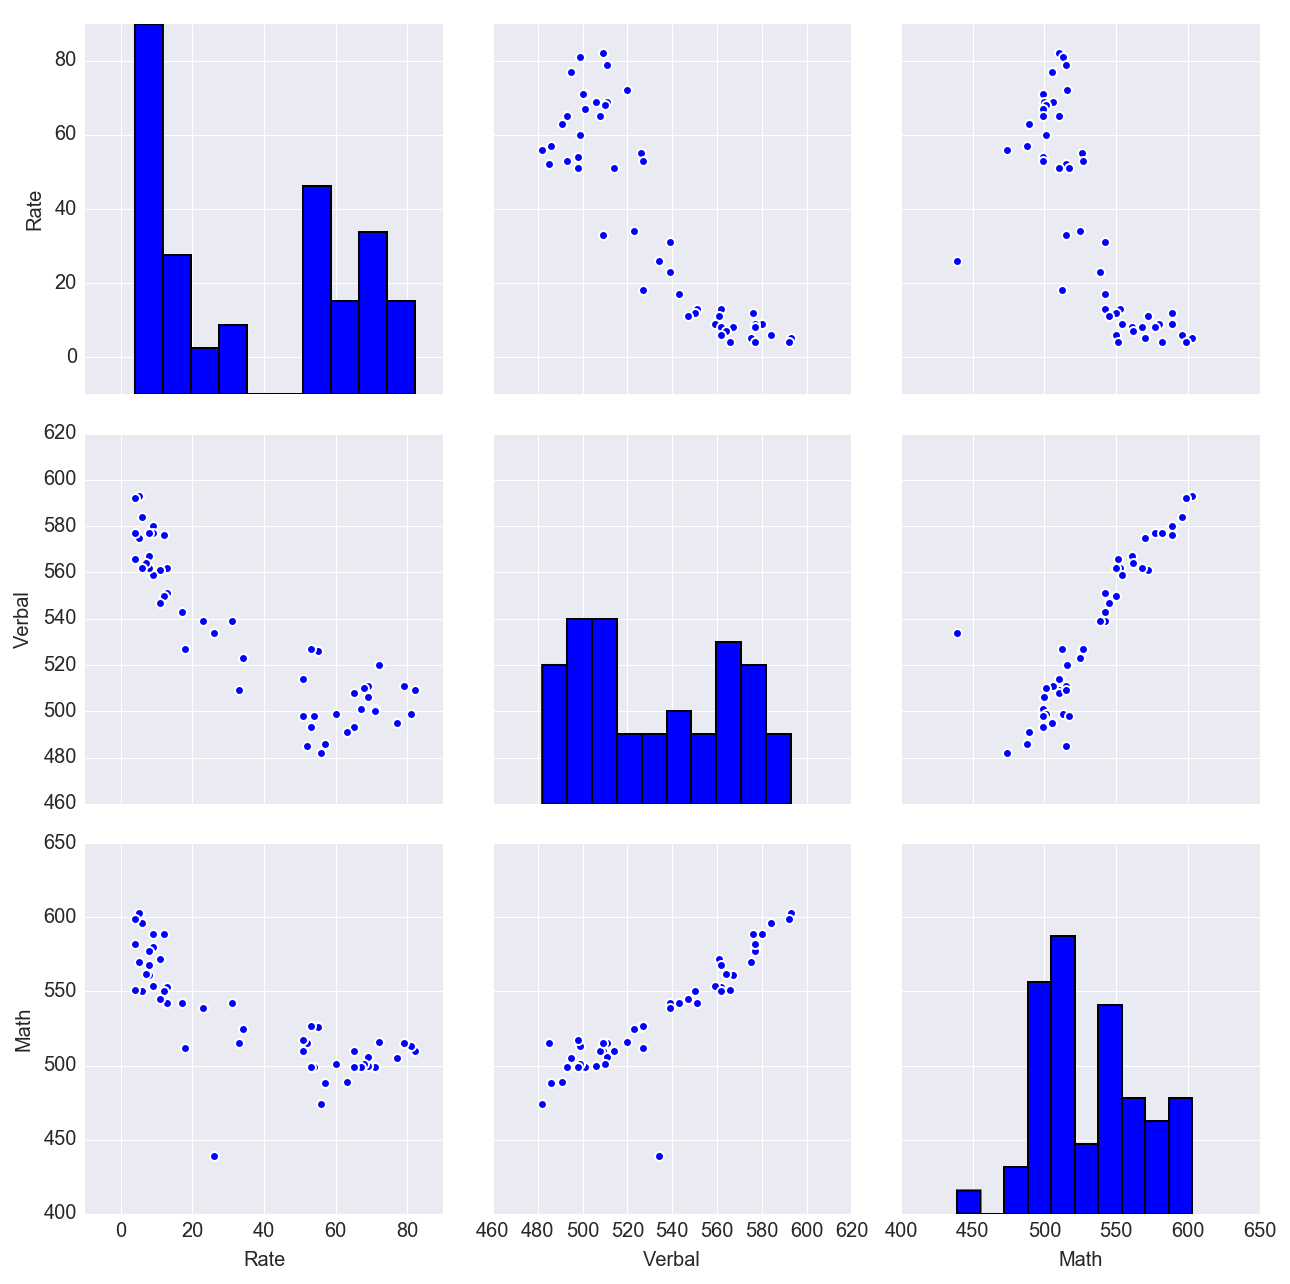

In [13]:
g = sns.pairplot(sat_scores,size=3)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

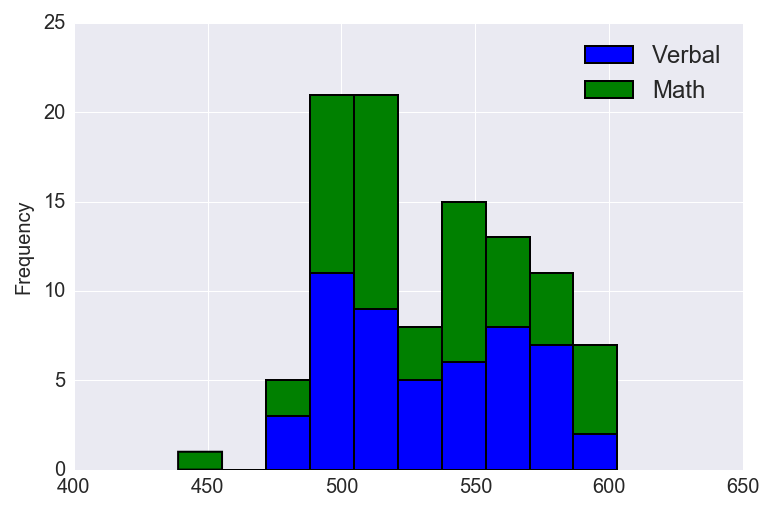

In [14]:
sat_scoresscores = sat_scores.drop(['State','Rate'],axis=1)
sat_scoresscores.head()
sat_scoresscores.plot.hist(stacked=True)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

### 4.2

* Box plots provide explicit information about the position of the median and various percentiles which can only be eyeballed with a histogram. 
* It is also much easier to compare multivariate distributions with boxplots in a single figure as compared to a stacked histogram.

* Rate cannot be plotted on the same chart as Math and Verbal as it does not have the same scale in the Y-axis.

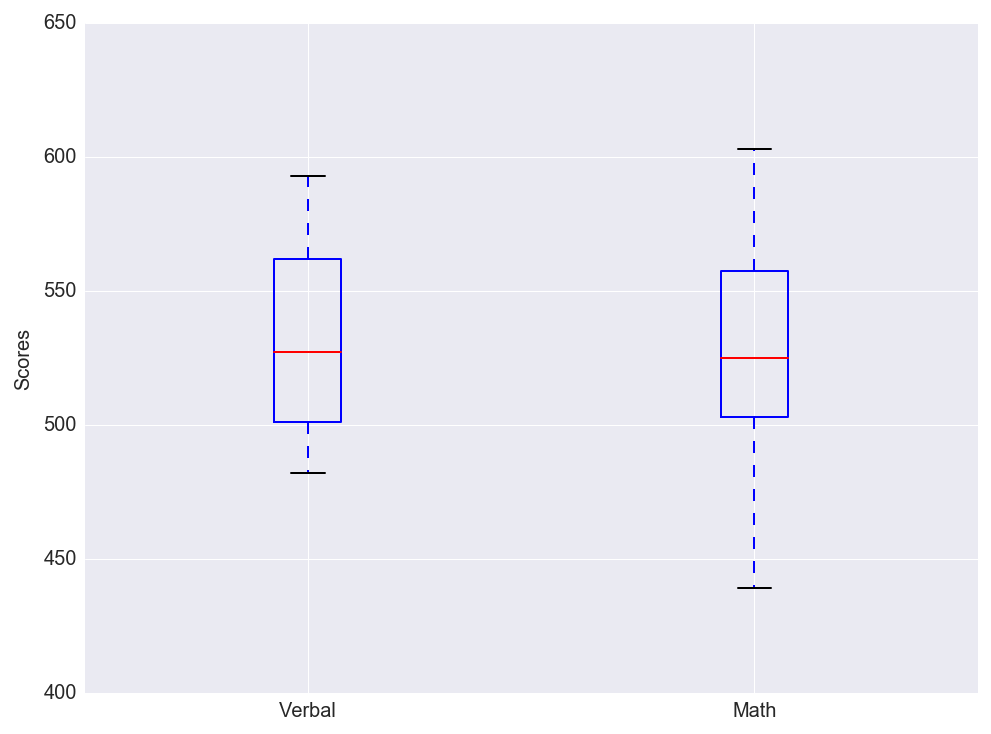

In [15]:
ax = sat_scoresscores.plot.box(figsize=(8,6))
ax.set_ylabel("Scores")

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


### 4.3

I normalised each of the variables in "Rate", "Verbal", and "Math" in proportion to their maximum and minimum value in scale range of $[0,1]$.

I feel like this method of scaling is better than standardisation using sample means and variances as the data is not distributed normally.


\begin{equation}
x' = \frac{x-min(x)}{max(x)-min(x)}
\end{equation}

In [16]:
sat_scores_normalised = sat_scores
sat_scores_normalised = sat_scores_normalised.drop('State', axis = 1)


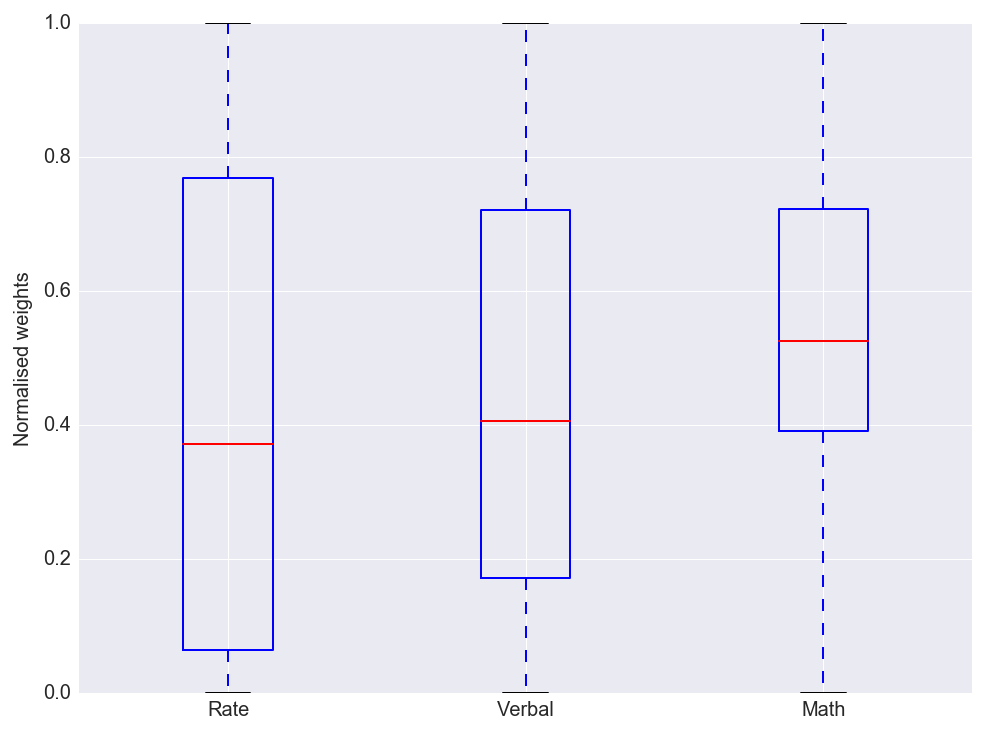

In [17]:
sat_scores_normalised['Rate'] = sat_scores_normalised['Rate'].apply(lambda x: float((x-sat_scores_normalised['Rate'].min()))/(sat_scores_normalised['Rate'].max()-sat_scores_normalised['Rate'].min()))
sat_scores_normalised['Verbal'] = sat_scores_normalised['Verbal'].apply(lambda x: float((x-sat_scores_normalised['Verbal'].min()))/(sat_scores_normalised['Verbal'].max()-sat_scores_normalised['Verbal'].min()))
sat_scores_normalised['Math'] = sat_scores_normalised['Math'].apply(lambda x: float((x-sat_scores_normalised['Math'].min()))/(sat_scores_normalised['Math'].max()-sat_scores_normalised['Math'].min()))

sat_scores_normalised.head()

ax = sat_scores_normalised.plot.box(figsize=(8,6))
ax.set_ylabel("Normalised weights")




<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




### 5.1

There are 24 states above the mean. This tells me that there are roughly as many states with scores above the mean as there are below the mean, indicating that there are not many outliers with high deviations from the mean.

In [18]:
highverb = sat_scores.loc[(sat_scores['Verbal'] > sat_scores['Verbal'].mean()),'State']
highverb.head(5)

26    CO
27    OH
28    MT
30    ID
31    TN
Name: State, dtype: object

In [19]:
highverb.count()

24

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

### 5.2
There are 26 states with a higher Verbal score than the median score. This compares favourably to the list of states with higher scores than the mean scores, as that indicates that the distribution is quite close to that of a normal distribution.

In [20]:
highverbmed = sat_scores.loc[(sat_scores['Verbal'] > sat_scores['Verbal'].median()),'State']
highverbmed.head(5)

26    CO
27    OH
28    MT
30    ID
31    TN
Name: State, dtype: object

In [21]:
highverbmed.count()

24

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [22]:
sat_scores['Difference'] = sat_scores['Verbal'] - sat_scores['Math']
sat_scores.head()

,State,Rate,Verbal,Math,Difference
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [23]:
df1 = sat_scores.sort_values('Difference', axis=0,ascending=False)
df1 = df1.iloc[0:10,[0,4]].reset_index(drop=True)
df1.head(3)

,State,Difference
0,OH,95
1,MS,15
2,WV,15


In [24]:
df2 = sat_scores.sort_values('Difference', axis=0,ascending=True)
df2 = df2.iloc[0:10,[0,4]].reset_index(drop=True)
df2.head(3)

,State,Difference
0,HI,-30
1,CA,-19
2,NJ,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


The correlation matrix tells me the Pearson's correlation coefficient between the different variable pairs. It has a value between -1 and 1, where -1 represents a perfect negative linear relation, 1 represents a perfect positive linear relation, and 0 represents no linear correlation between the variables.

In [25]:
sat_scores.corr()

,Rate,Verbal,Math,Difference
Rate,1.000000,-0.888121,-0.773419,-0.098671
Verbal,-0.888121,1.000000,0.899909,0.044527
Math,-0.773419,0.899909,1.000000,-0.395574
Difference,-0.098671,0.044527,-0.395574,1.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

* count: It is the total count of the elements in that column.
* mean: It is the average value of the elements in that column.
* std: It is the average distance of eache elements in the column from its mean.
* min: It is the minimum value of the elements in that column.
* max: It is the maximum value of the elements in that column.
* 25%: It is the element that represents the 25th percentile of the elements in a column, or where it is 0.25 in the cumulative distribution function.
* 50%: Is the 50th percentile, which is also known as the median.
* 75%: Is the 75th percentile.


In [26]:
sat_scores.describe()

,Rate,Verbal,Math,Difference
count,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275
std,27.550681,33.360667,36.287393,15.839811
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,503.000000,-6.000000
50%,33.000000,527.000000,525.000000,0.000000
75%,64.000000,562.000000,557.500000,4.500000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

* The covariance matrix is different from the correlation matrix in that it is not normalised by the standard deviations of the 2 variables being compared against. While the correlation matrix is dimensionless and between $[-1,1]$, the covariance is not and lies between $[{-\infty},{\infty}]$

* Converting the covariance to the correlation is just a simple matter of dividing the covariance by the standard deviations of both variables.

* The correlation matrix is preferred as it is dimensionless and scaled already by the standard deviations of both variables.

In [27]:
sat_scores.cov()

,Rate,Verbal,Math,Difference
Rate,759.04,-816.280000,-773.220000,-43.060000
Verbal,-816.28,1112.934118,1089.404706,23.529412
Math,-773.22,1089.404706,1316.774902,-227.370196
Difference,-43.06,23.529412,-227.370196,250.899608


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [28]:
drugs = pd.read_csv('drug-use-by-age.csv')
drugs

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [29]:
drugs.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

The drugs dataset has well labelled columns. The datatype of cocaine,crack,heroin,inhalant,oxytocin and meth frequency is an object and not a float, which indicates that there are values which are not floats in there messing up with the datatype.

In [30]:
drugs.isnull().sum()

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          0
crack-use                  0
crack-frequency            0
heroin-use                 0
heroin-frequency           0
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         0
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        0
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             0
sedative-use               0
sedative-frequency         0
dtype: int64

There aren't any null values, but the columns still have to be cleaned to fix the datatypes.

In [31]:
drugs[['age','n']]

,age,n
0,12,2798
1,13,2757
2,14,2792
3,15,2956
4,16,3058
5,17,3038
6,18,2469
7,19,2223
8,20,2271
9,21,2354


The ages column could be done better instead of grouping the age ranges beyond the ages of 22. This changes the granularity of data across ranges of ages which will affect the analysis.

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [32]:
drugs.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

In [33]:
# replaced cells with '-' in them to 0 and converted the column into a float datatype instead of an object

drugs['cocaine-frequency']=drugs['cocaine-frequency'].str.replace('-','0').astype('float')
drugs['crack-frequency']=drugs['crack-frequency'].str.replace('-','0').astype('float')
drugs['heroin-frequency']=drugs['heroin-frequency'].str.replace('-','0').astype('float')
drugs['inhalant-frequency']=drugs['inhalant-frequency'].str.replace('-','0').astype('float')
drugs['oxycontin-frequency']=drugs['oxycontin-frequency'].str.replace('-','0').astype('float')
drugs['meth-frequency']=drugs['meth-frequency'].str.replace('-','0').astype('float')
drugs.dtypes


age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object

In [34]:
drugs.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [35]:
# creating a new dataframe just for percentages of drug use.
drugsuse = drugs.iloc[:,[0,1,2,4,6,8,10,12,14,16,18,20,22,24,26]]
drugsuse.set_index('age',inplace=True)
drugsuse.head()

,n,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
age,,,,,,,,,,,,,,
12,2798,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
13,2757,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
14,2792,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
15,2956,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
16,3058,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2


In [36]:
drugsfreq = drugs.iloc[:,[0,1,3,5,7,9,11,13,15,17,19,21,23,25,27]]
drugsfreq.set_index('age',inplace=True)
drugsfreq.tail()

,n,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
age,,,,,,,,,,,,,,
26-29,2628,52.0,52.0,5.0,6.0,50.0,3.0,4.0,13.0,13.5,10.0,7.0,30.0,4.0
30-34,2864,52.0,72.0,8.0,15.0,66.0,2.0,3.5,22.0,46.0,8.0,12.0,54.0,10.0
35-49,7391,52.0,48.0,15.0,48.0,280.0,3.0,10.0,12.0,12.0,6.0,24.0,104.0,10.0
50-64,3923,52.0,52.0,36.0,62.0,41.0,44.0,13.5,12.0,5.0,10.0,24.0,30.0,104.0
65+,2448,52.0,36.0,0.0,0.0,120.0,2.0,0.0,24.0,0.0,5.0,364.0,0.0,15.0


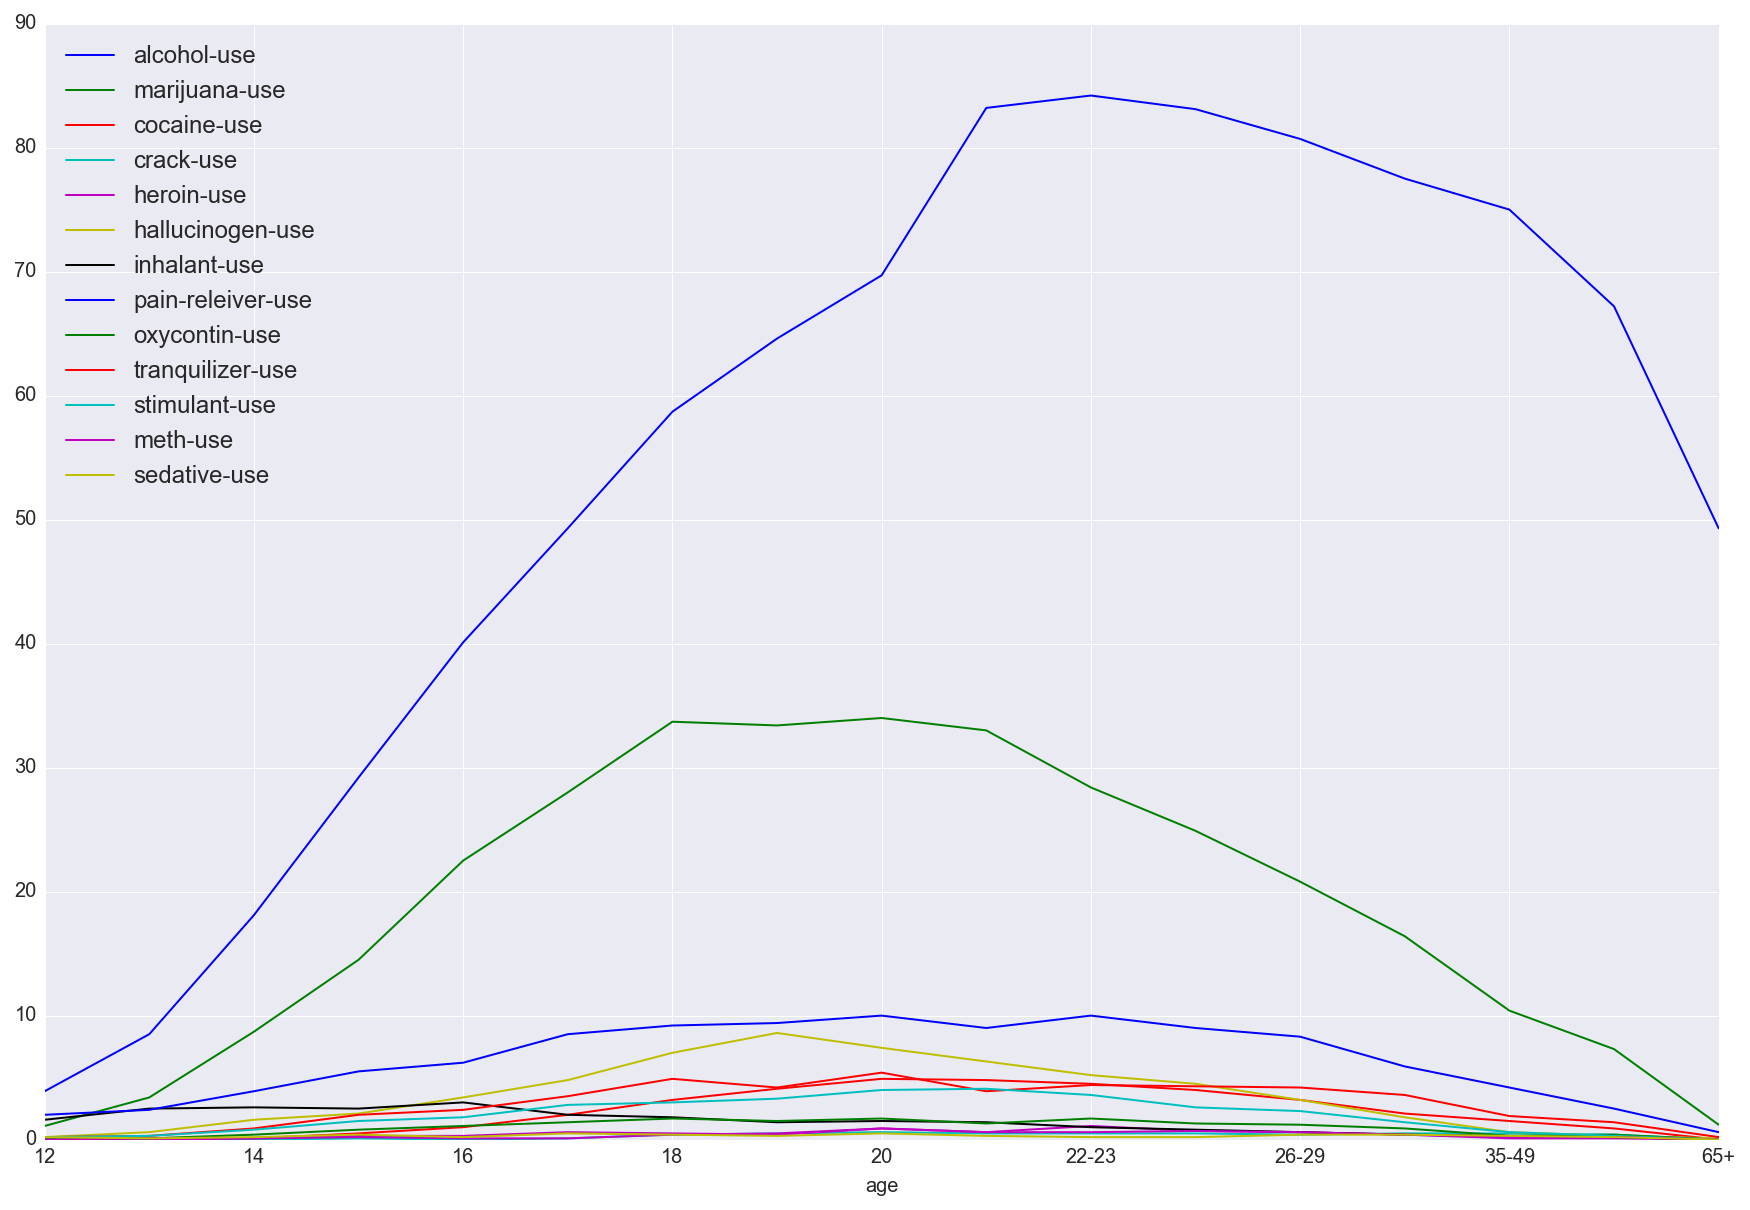

In [37]:
for i in range(drugsuse.shape[1]-1):
    drugsuse.iloc[:,i+1].plot(figsize=(15,10))
    
plt.legend(loc='best')


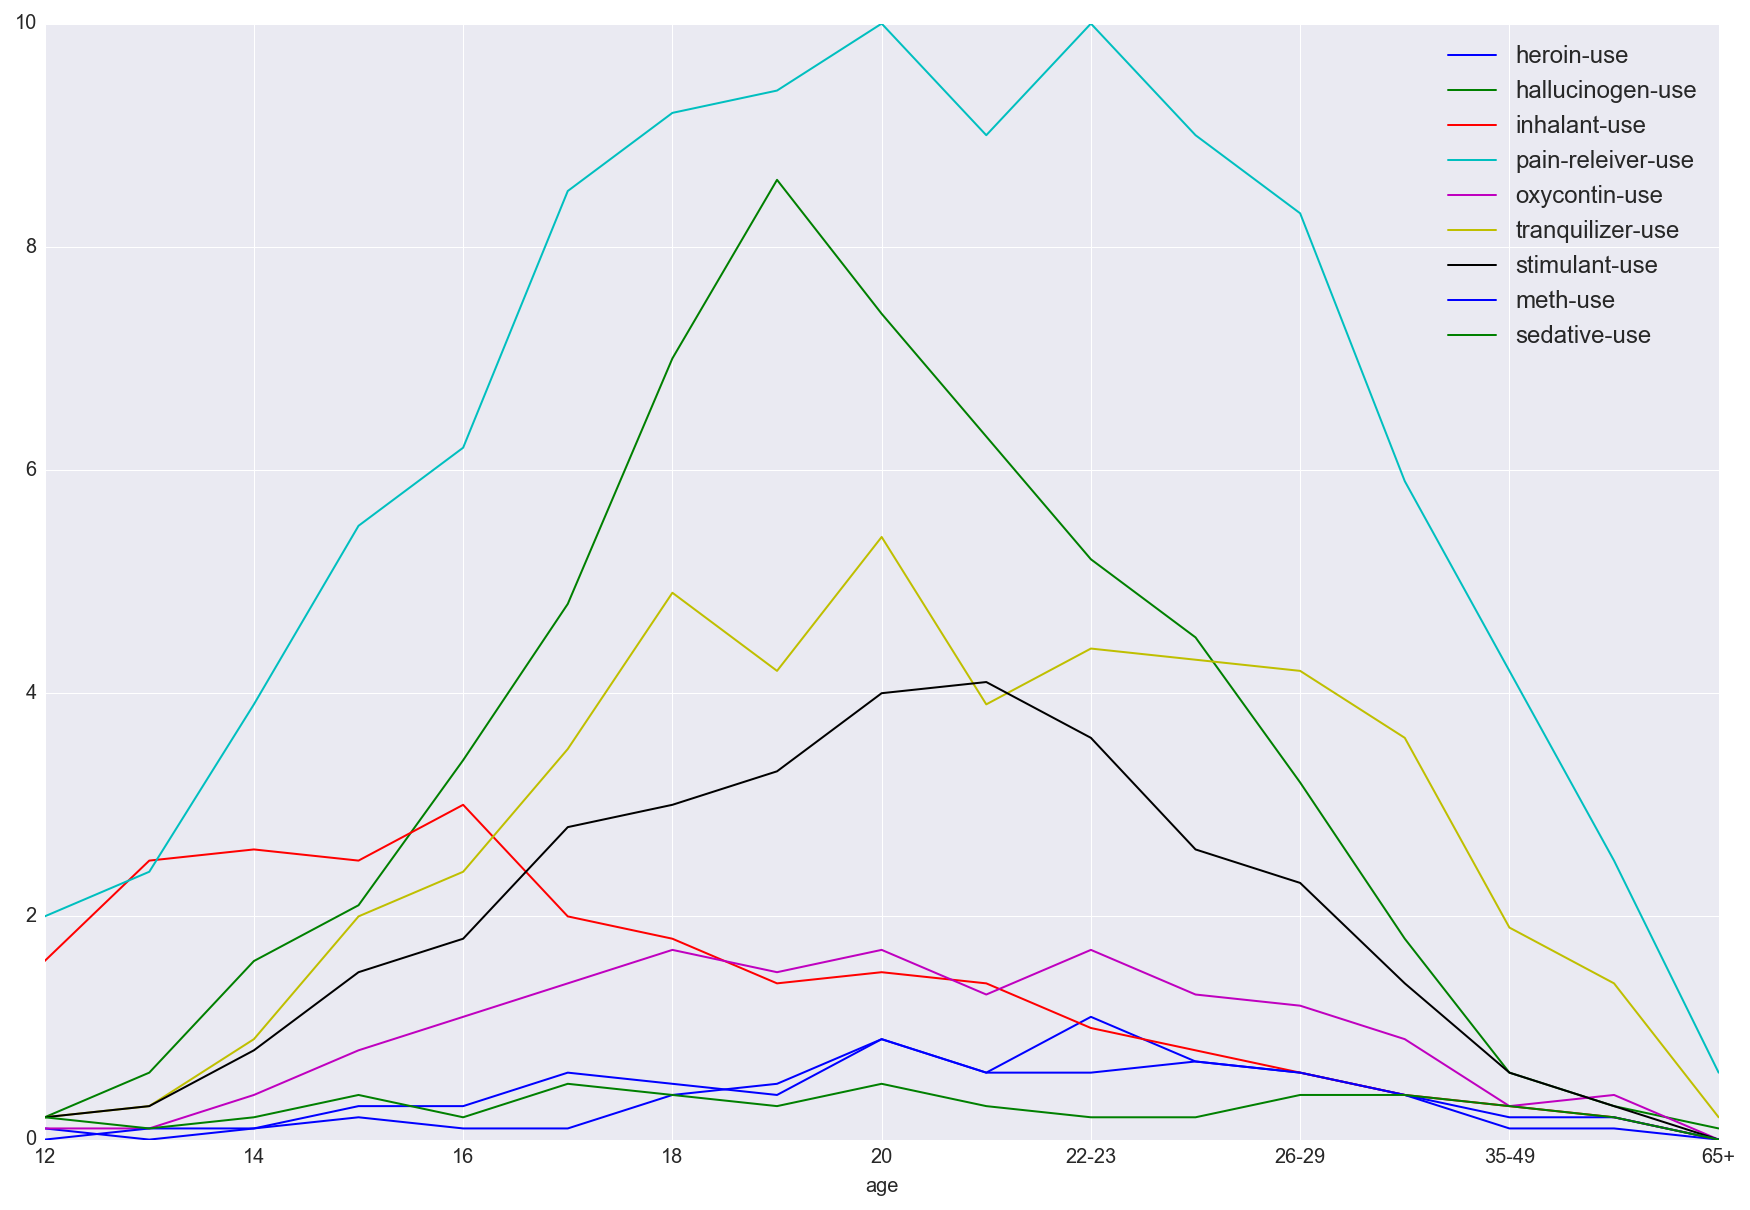

In [69]:
for i in range(drugsuse.shape[1]-5):
    drugsuse.iloc[:,i+5].plot(figsize=(15,10))
    
plt.legend(loc='best')

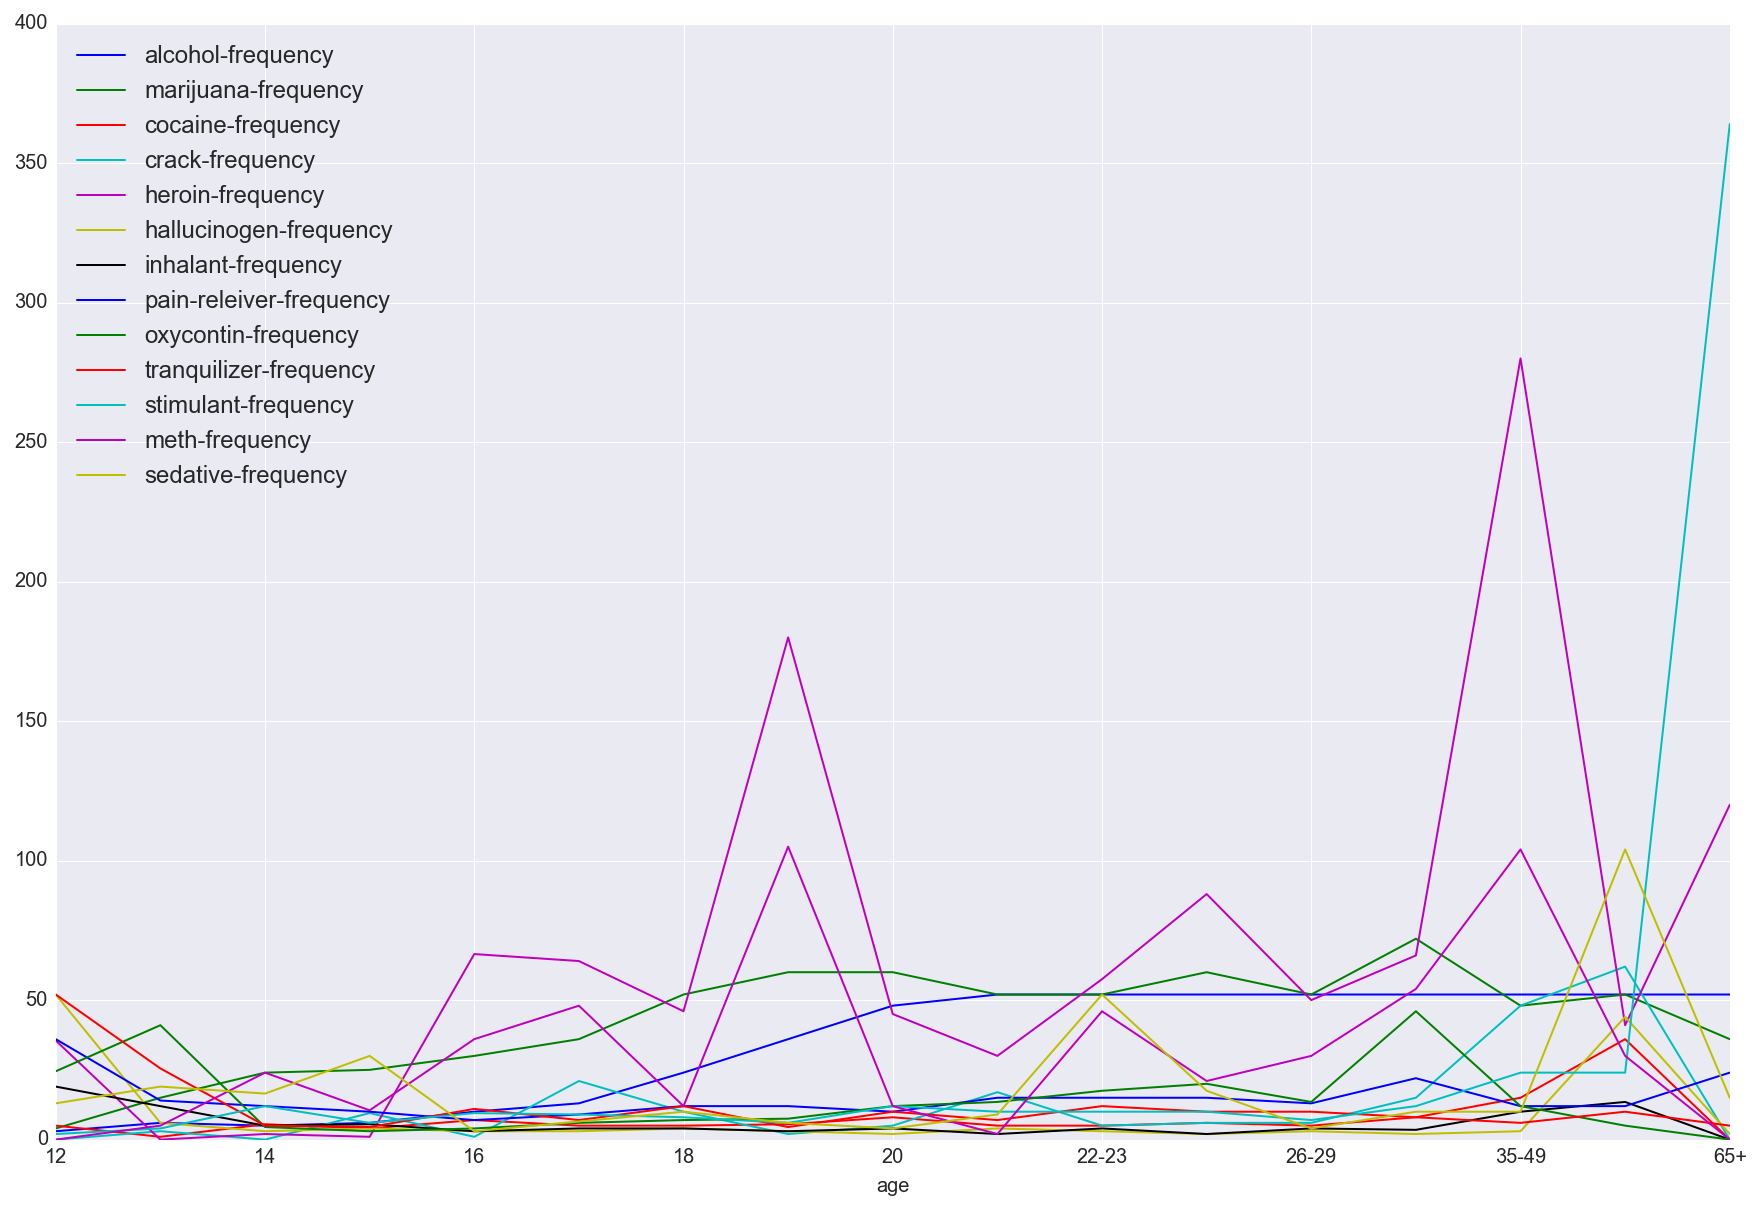

In [42]:
for i in range(drugsfreq.shape[1]-1):
    drugsfreq.iloc[:,i+1].plot(figsize=(15,10))
    
plt.legend(loc='best')


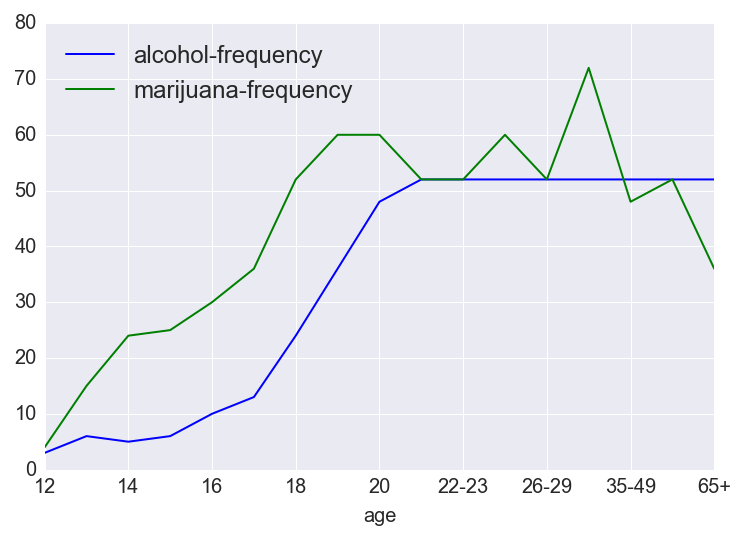

In [68]:
drugs.set_index('age')[['alcohol-frequency','marijuana-frequency']].plot()

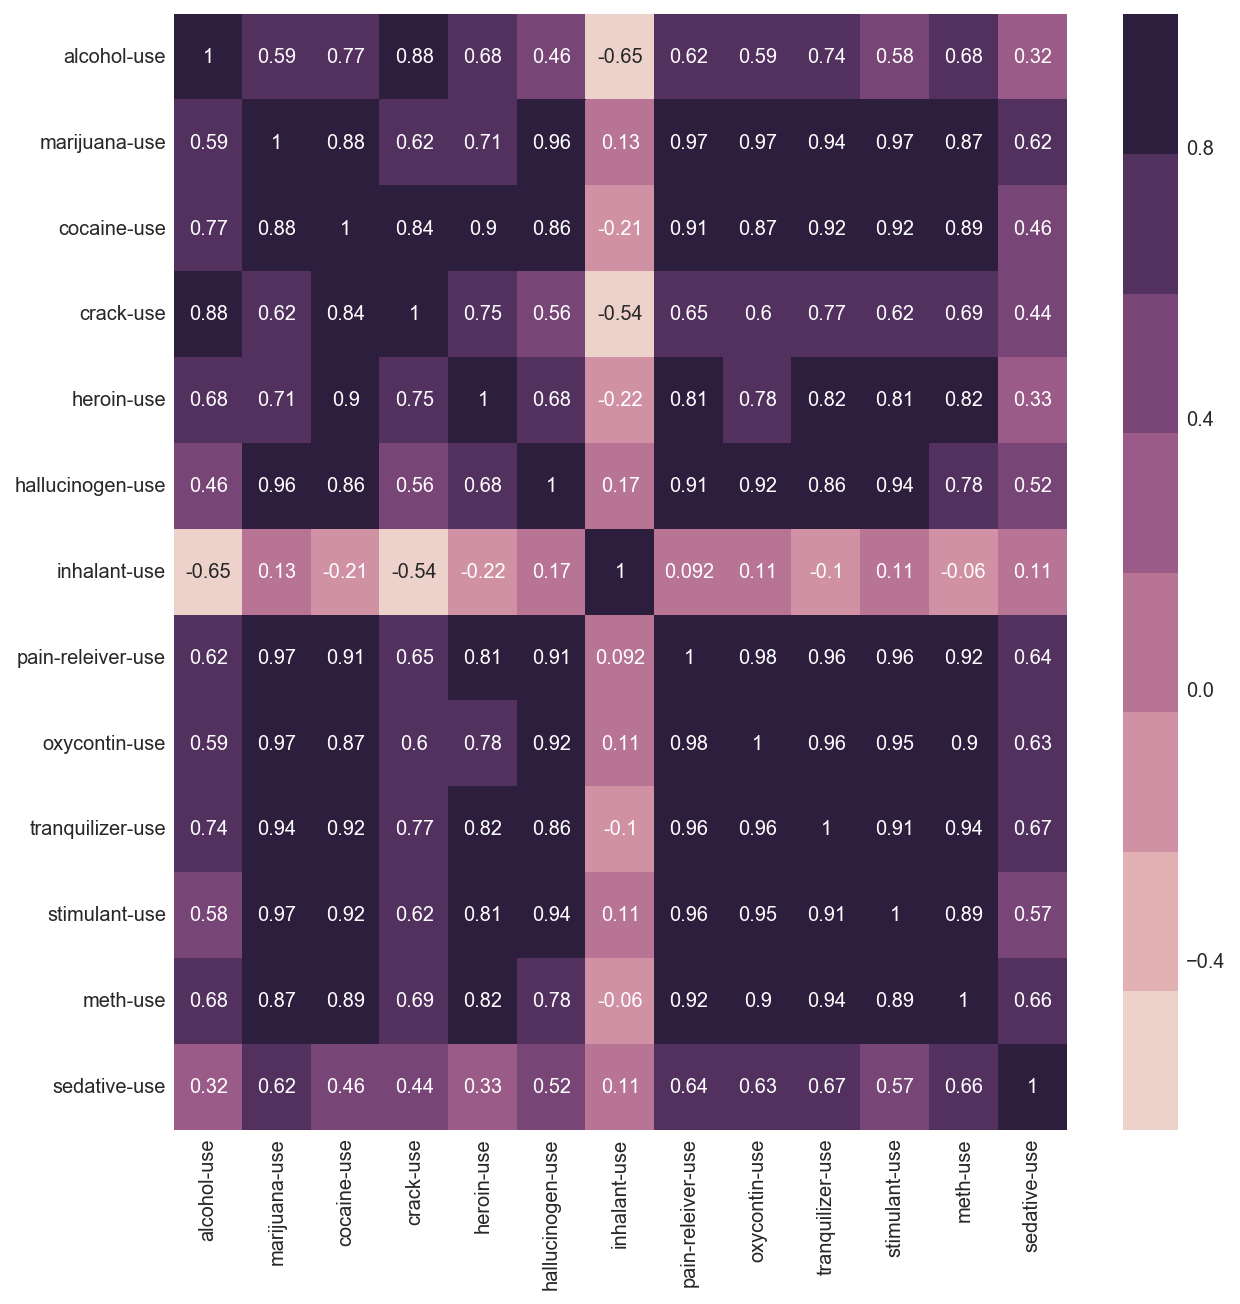

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(drugsuse.iloc[:,1:].corr(),cmap=sns.cubehelix_palette(8),annot=True)

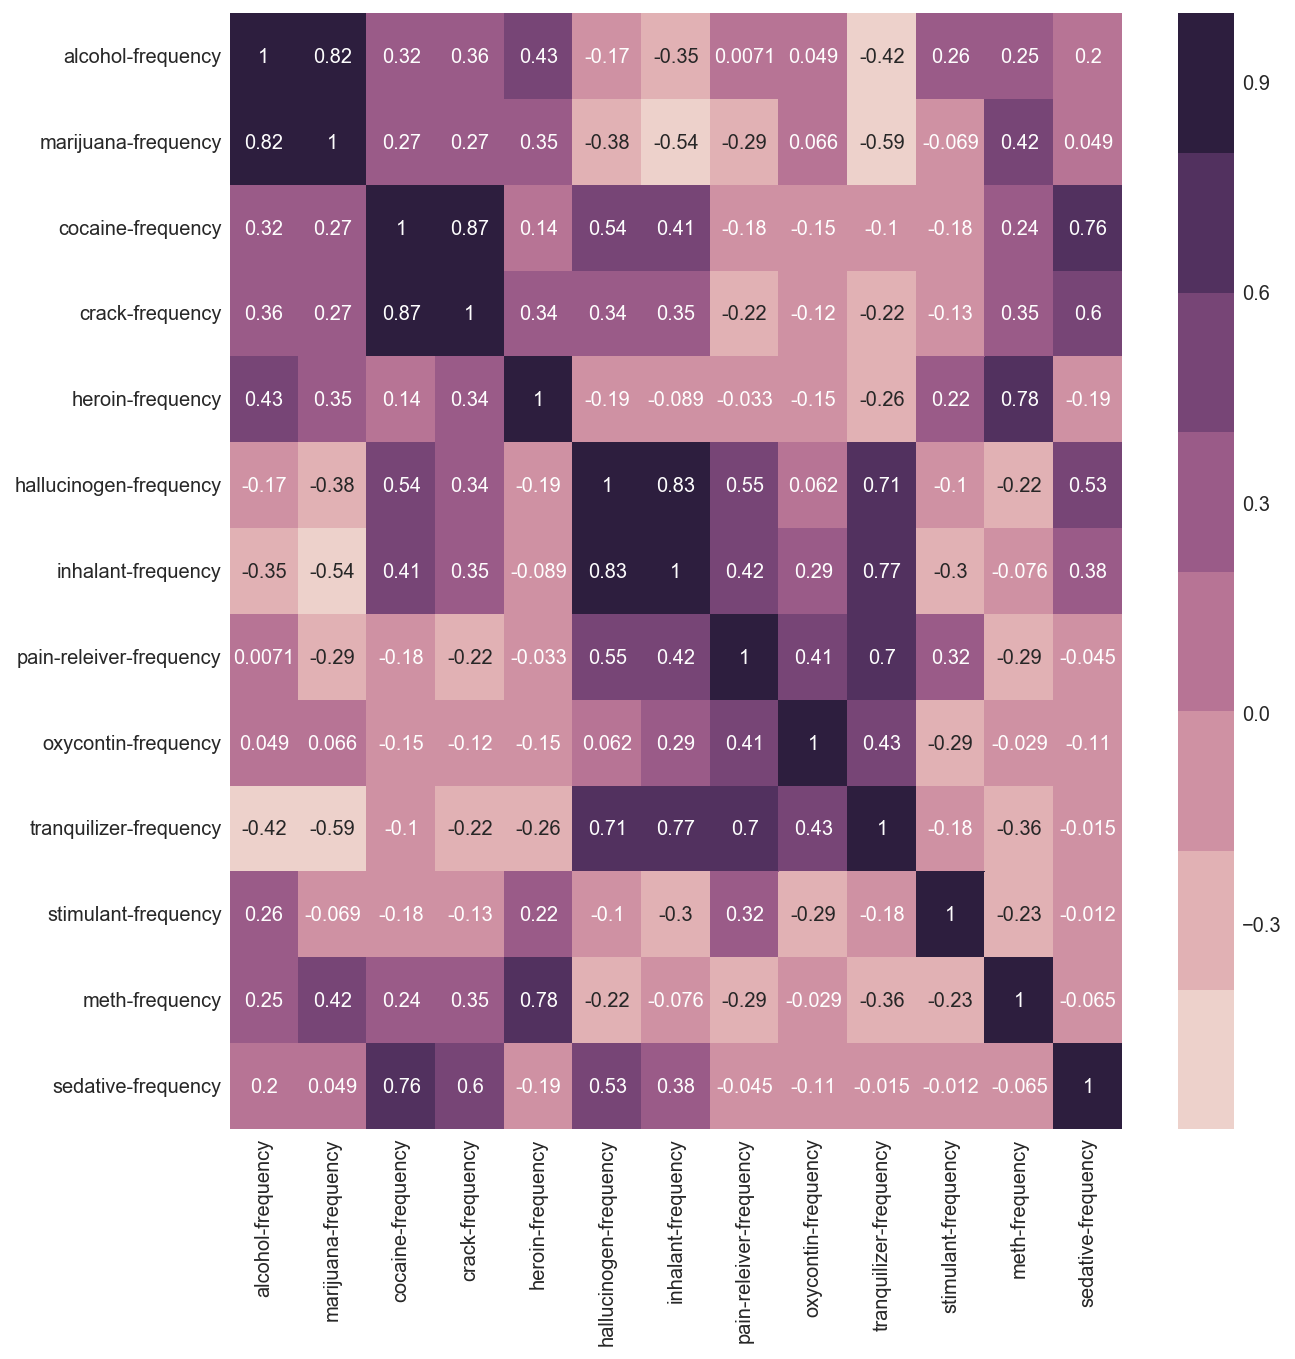

In [70]:
plt.figure(figsize=(10,10))

sns.heatmap(drugsfreq.iloc[:,1:].corr(),cmap=sns.cubehelix_palette(8),annot=True)

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

----------------------------------------------------
## 7.3

** Question and deliverables**

Question: I would like to know if the drugs that are used by a significant percentage of the population (Alcohol and Marijuana) are more frequently used than drugs that are used by a smaller percentage of the population.


Null hypothesis: There is no significant difference between the frequency of usage between Alcohol/Marijuana users and other drug users.

Alternative hypothesis: There is a significant difference between the frequency of usage between Alcohol/Marijuana users and other drug users.

In [45]:
drugsheavyuse = drugs.iloc[:,[0,2,3,4,5]]    # created new dataset for marijuana and alcohol
drugslightuse = drugs.iloc[:,[0,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]]  # rest of drugs

# finds the mean of alcohol and marijuana use
drugsheavyuse.loc[:,'heavyuse'] =  \
    (drugsheavyuse.loc[:,'alcohol-use']+drugsheavyuse.loc[:,'marijuana-use'])/2    

drugsheavyuse.loc[:,'heavyfreq'] = \
    (drugsheavyuse.loc[:,'alcohol-frequency']+drugsheavyuse.loc[:,'marijuana-frequency'])/2 #freq

drugslightuse.loc[:,"lightuse"] = drugslightuse.iloc[:,[1,3,5,7,9,11,13,15,17,19,21]]\
                                .apply(lambda x:sum(x)/len(x),axis=1)  #other drugs
drugslightuse.loc[:,"lightfreq"] = drugslightuse.iloc[:,[2,4,6,8,10,12,14,16,18,20,22]]\
                                .apply(lambda x:sum(x)/len(x), axis=1)

/Users/melvinperera/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/melvinperera/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [46]:
# create a new dataframe

heavyvslight = pd.concat([drugs['age'],drugsheavyuse['heavyuse'],\
                          drugsheavyuse['heavyfreq'],drugslightuse['lightuse'],\
                          drugslightuse['lightfreq']], axis=1)
heavyvslight.set_index('age',inplace=True)

heavyvslight.head()





,heavyuse,heavyfreq,lightuse,lightfreq
age,,,,
12,2.50,3.5,0.427273,21.727273
13,5.95,10.5,0.590909,11.863636
14,13.40,14.5,0.972727,8.136364
15,21.85,15.5,1.445455,8.000000
16,31.30,20.0,1.772727,13.727273


In [47]:
print heavyvslight['heavyfreq'].mean()
print heavyvslight['lightfreq'].mean()
meandifference = heavyvslight['heavyfreq'].mean()-heavyvslight['lightfreq'].mean()
print meandifference

38.1470588235
20.5106951872
17.6363636364


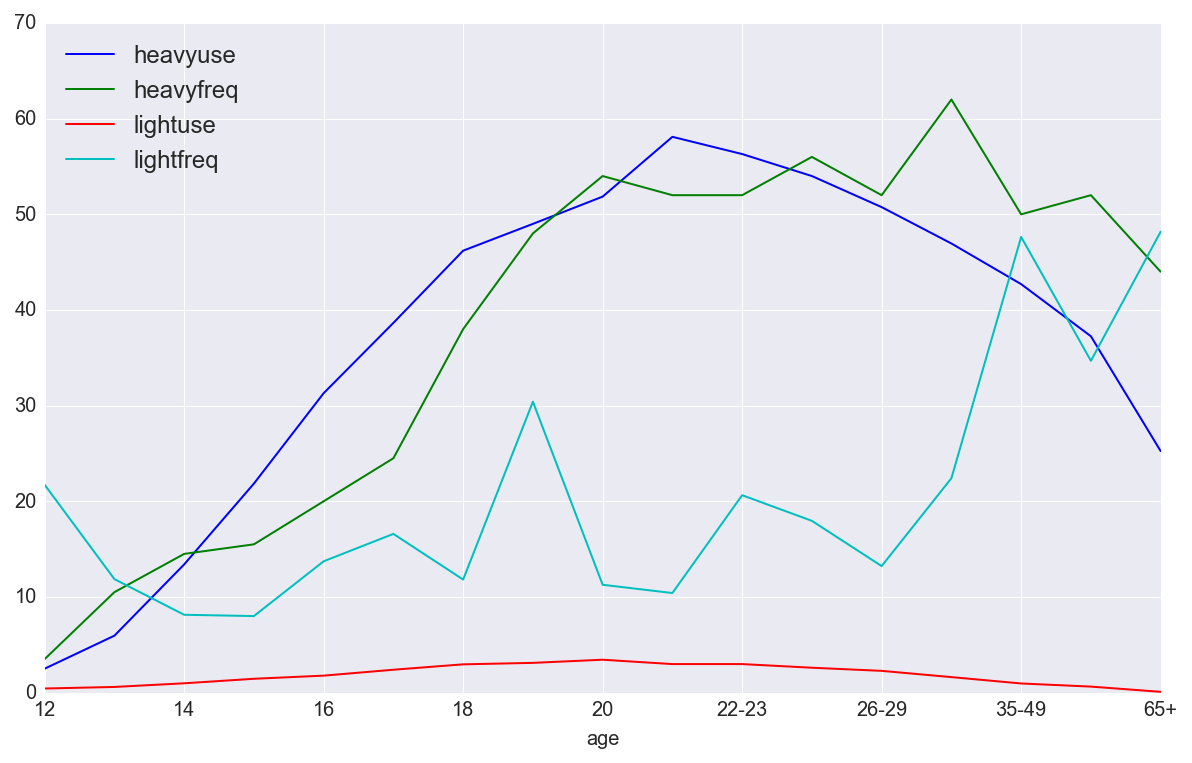

In [48]:
for i in range(heavyvslight.shape[1]):
    heavyvslight.iloc[:,i].plot(figsize=(10,6))
    
plt.legend(loc='best')

In [49]:
stats.ttest_ind(heavyvslight['heavyfreq'], heavyvslight['lightfreq'], equal_var=False)

Ttest_indResult(statistic=3.1917904328233555, pvalue=0.0034803335508831476)

**Report**

After separating the drugs into heavy (Alcohol and Marijuana) and light usage (the rest in the list) drugs, I took the mean values of their usage and frequency of usage variables and performed a t-test to evaluate the null hypothesis. By running the t-test on the frequency variables it can be seen that the **t-statistic** is **3.1918**, with a associated **p-value** of **0.00348**. 

This means that there is a 0.35% probability that we could have ended up with a statistic at least as extreme as this if there is no difference in the frequency of usage between heavy and light usage drugs. **Based on a 3-sigma rule (99.7% or 3 standard deviations from the mean) we fail to reject the null hypothesis, but with a 2 sigma rule (95% or 2 standard deviations from the mean) we can reject the null hypothesis and accept that there is a difference in the frequency of drug usage between the heavy and light usage drugs.**

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

### 8

For univariate distributions, the general threshold for identifying outliers is to see if the point lies more than 1.5 times IQR above or below the IQR range, which is defined as the range between the values of the 25th and 75th percentile of the distribution.


In [50]:
# Pulling the rate variable out of the SAT dataset
sat_scores_dropped = sat_scores.drop(['Rate','Difference'],axis=1)
sat_scores_dropped.head()

,State,Verbal,Math
0,CT,509,510
1,NJ,499,513
2,MA,511,515
3,NY,495,505
4,NH,520,516


In [51]:
verbal75, verbal25 = np.percentile(sat_scores_dropped['Verbal'], [75 ,25])
iqrverbal = verbal75 - verbal25        # finding the IQR 
verbalmin = verbal25-(iqrverbal*1.5)   # minimum threshold value for outlier
verbalmax = verbal75+(iqrverbal*1.5)   # maximum

math75, math25 = np.percentile(sat_scores_dropped['Math'], [75 ,25])
iqrmath = math75 - math25
mathmin = math25-(iqrmath*1.5)
mathmax = math75+(iqrmath*1.5)

In [52]:
# Finding any outliers for the Verbal column

sat_scores_dropped.loc[(sat_scores_dropped['Verbal'] > verbalmax) | (sat_scores_dropped['Verbal'] < verbalmin)]


,State,Verbal,Math


In [53]:
# Similarly, for the Math column

sat_scores_dropped.loc[(sat_scores_dropped['Math'] > mathmax) | (sat_scores_dropped['Math'] < mathmin)]


,State,Verbal,Math


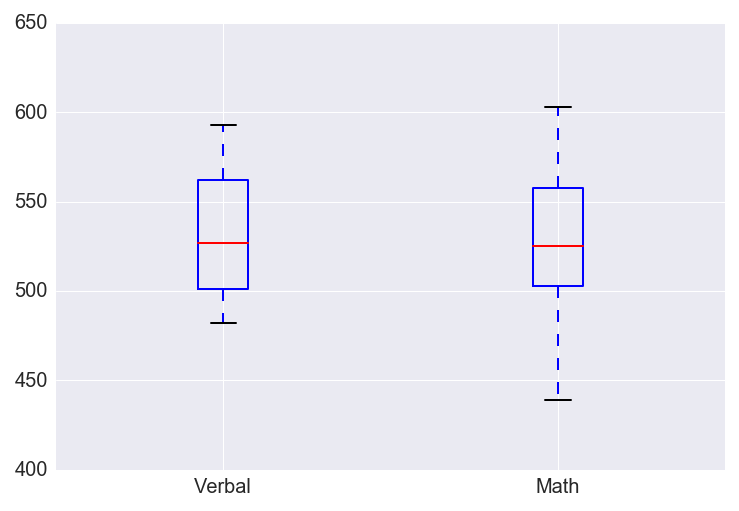

In [54]:
sat_scores_dropped.plot.box()

As can be seen, there are no points that appear beyond 1.5x that of the IQR. This is also confirmed from a boxplot which did not graphically indicate any outliers.

So I decided to compare the outliers from plotting the Verbal and Math points together. 

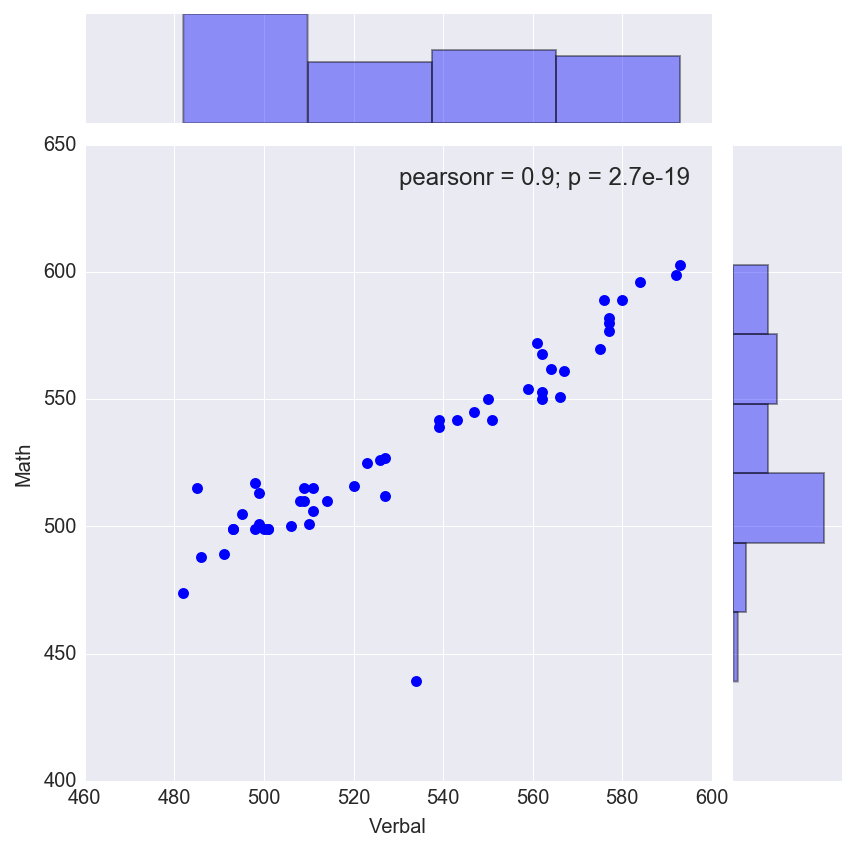

In [55]:
sns.jointplot("Verbal","Math", data=sat_scores_dropped)

There seemed to be 1 datapoint that was quite far off from the rest. I googled around and found the Mahalanobis distance, which detects outliers in multidimensional distributions. It does this by comparing the distance between each point and the distribution's centre of mass. It is not the euclidean distance, but the distance in relation to the principal axis of the distribution based on its covariance.

The formula is for the Mahalanobis distance is:

$$ MD = \sqrt{(x-\mu)^{T}\Sigma^{-1}(x-\mu)}$$

Where $x$ is the coordinates of the 2D distribution, $\mu$ is its mean, and $\Sigma$ is the covariance matrix of the distribution. Note that $\Sigma^{-1}$ is used: this is the inverse of the covariance matrix.

In [56]:
covariance =np.cov(sat_scores_dropped['Verbal'],sat_scores_dropped['Math'])
covinv = np.linalg.inv(covariance)
print covariance

[[ 1112.93411765  1089.40470588]
 [ 1089.40470588  1316.77490196]]


In [57]:
means = [sat_scores_dropped['Verbal'].mean(),sat_scores_dropped['Math'].mean()]
print means

[532.5294117647059, 531.843137254902]


In [58]:
verbaldiff = np.array(sat_scores_dropped['Verbal'].apply(lambda x:x-means[0]))
mathdiff = np.array(sat_scores_dropped['Math'].apply(lambda x:x-means[1]))
difference = np.transpose([verbaldiff,mathdiff])
print len(difference.shape)

2


In [59]:
#test=np.transpose([np.array(sat_scores_dropped['Verbal']), np.array(sat_scores_dropped['Math'])])
#mean = [[sat_scores_dropped['Math'].mean(),sat_scores_dropped['Verbal'].mean()] for i in range(len(test))]
#mean = np.array(mean)
#print test.shape, mean.shape
#cov = np.cov(test,mean)
#invcov = np.linalg.inv(cov)


#m = spatial.distance.mahalanobis(test, mean, invcov)

I tried to use the scipy method to calculate the mahalanobis distance but I ended up with a singular matrix for the covariance that I could not invert. (Help needed). 

However, I found some resources online that helped me to define my own function to compute the Mahalanobis distance.

In [60]:
def Mahalanobis(x,y,covariance):
    ''' This function computes the mahalanobis distance between two pandas series x and y.
        C is the covariance matrix of x and y.'''
    covinv = np.linalg.inv(covariance)                  # inverse of covariance
    means= [x.mean(), y.mean()]                         # array of means
    xdiff = np.array(x.apply(lambda x:x-means[0]))      # distance of datapoints from their means
    ydiff = np.array(y.apply(lambda x:x-means[1]))
    difference = np.transpose([xdiff,ydiff])            # transposed array to get a 52 by 2 array
    md= []
    for i in range(len(difference)):                    #applying mahalanobis formula
        md.append(np.sqrt(np.dot(np.dot(np.transpose(difference[i]),covinv),difference[i])))   
    return md
    


    
a = Mahalanobis(sat_scores_dropped['Verbal'],sat_scores_dropped['Math'],covariance)
threshold = np.mean(a)*2    # setting a threshold value of 2 times the mean mahalanobis distance.
for i,v in enumerate(a):    # This loop finds the indices of the dataframe that has a distance above the
    if v > threshold:       # threshold value.
        print i,v

21 2.35543984965
27 5.9583301738


By using a threshold value of double the mean Mahalanobis distance, I managed to detect 2 outliers from the data, which are plotted below.

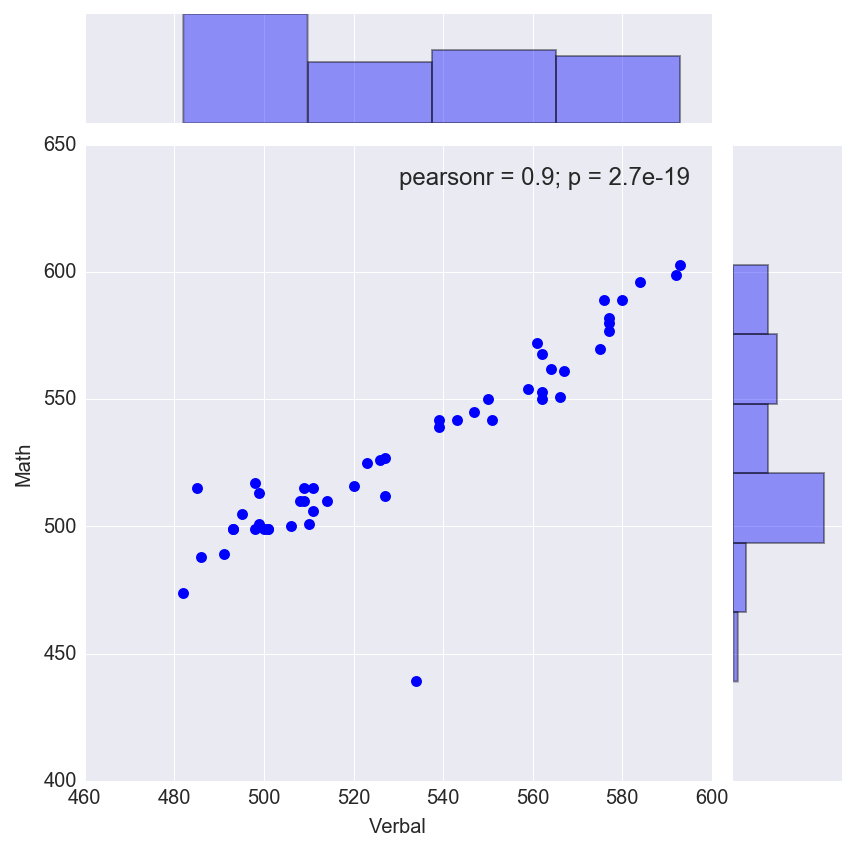

In [61]:
sns.jointplot("Verbal","Math", data=sat_scores_dropped)

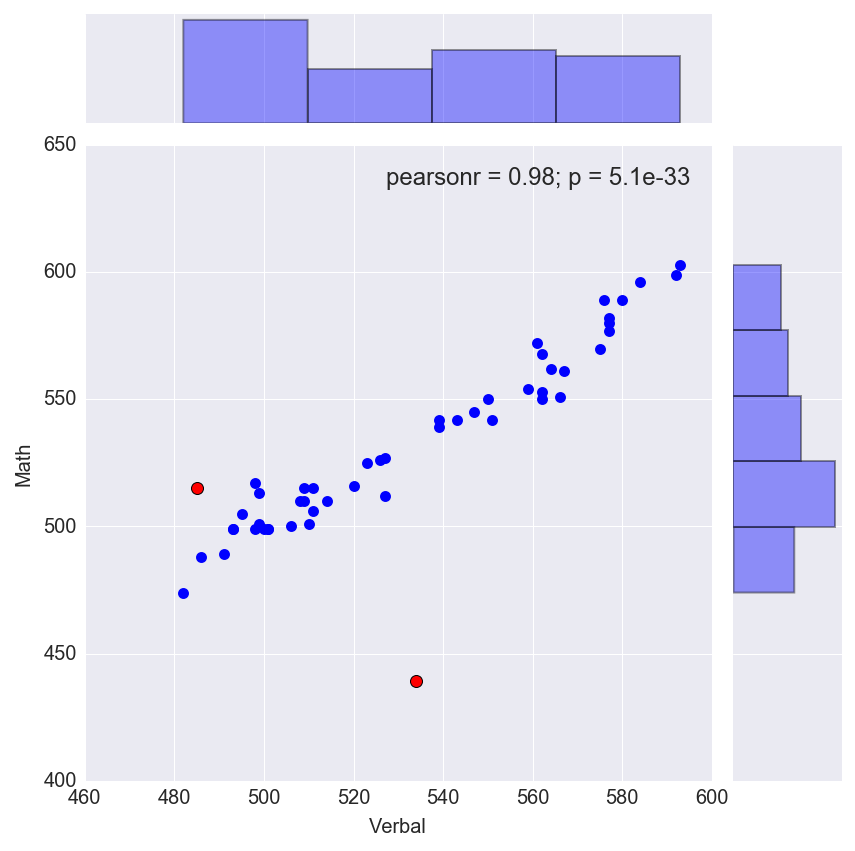

In [62]:

sat_scores_outliers = sat_scores_dropped.drop([21,27])
sat_outliers = sat_scores_dropped.loc[[21,27]]
a =sns.jointplot("Verbal","Math", data = sat_scores_outliers)
a.ax_joint.plot(sat_outliers["Verbal"],sat_outliers["Math"],'ro')

In [63]:
sat_scores_removed = sat_scores_outliers
print "Math mean difference- Before: {} After: {}".format(sat_scores_dropped['Math'].mean(),sat_scores_removed['Math'].mean())
print "Math median difference- Before: {} After: {}".format(sat_scores_dropped['Math'].median(),sat_scores_removed['Math'].median())
print "Math std difference- Before: {} After: {}".format(sat_scores_dropped['Math'].std(),sat_scores_removed['Math'].std())
print "----------------------------------"
print "Verbal mean difference- Before: {} After: {}".format(sat_scores_dropped['Verbal'].mean(),sat_scores_removed['Verbal'].mean())
print "Verbal median difference- Before: {} After: {}".format(sat_scores_dropped['Verbal'].median(),sat_scores_removed['Verbal'].median())
print "Verbal std difference- Before: {} After: {}".format(sat_scores_dropped['Verbal'].std(),sat_scores_removed['Verbal'].std())


Math mean difference- Before: 531.843137255 After: 534.081632653
Math median difference- Before: 525.0 After: 526.0
Math std difference- Before: 36.2873931547 After: 34.3661878006
----------------------------------
Verbal mean difference- Before: 532.529411765 After: 533.469387755
Verbal median difference- Before: 527.0 After: 527.0
Verbal std difference- Before: 33.3606672242 After: 33.3361053269


The standard deviation decreased for both Math and Verbal, which indicates that removing the outliers improved the precision of the distribution.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


The pearson correlation evaluates the linear relationship between 2 different continuous variables. The spearman rank correlation instead compares the monotonic relationship (ie whether it just increases or decreases). The spearman rank correlation is actually the pearson's correlation between the same ranked variable in the distribution.

In [64]:
sat_scores[['Verbal','Math']].corr(method='spearman')

,Verbal,Math
Verbal,1.000000,0.909413
Math,0.909413,1.000000


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [65]:
sat_scores['Percentiles'] = sat_scores['Rate'].apply(lambda x: stats.percentileofscore(sat_scores['Rate'],x))

sat_scores.loc[(sat_scores['State'] == 'CA'),'Percentiles']


23    55.882353
Name: Percentiles, dtype: float64

The percentile is related to the spearman rank correlation by 

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

Percentile scoring is useful as it makes it easy to see how high or low into the percentile it is. If it is close to 100% or 0% it is usually an indicator that the data point is very far away from the median and more likely to be an outlier.

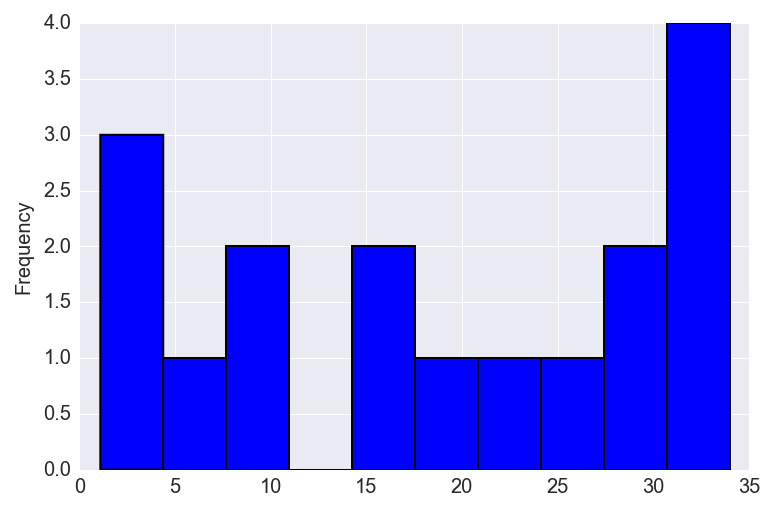

In [66]:
drugs['marijuana-use'].plot.hist()

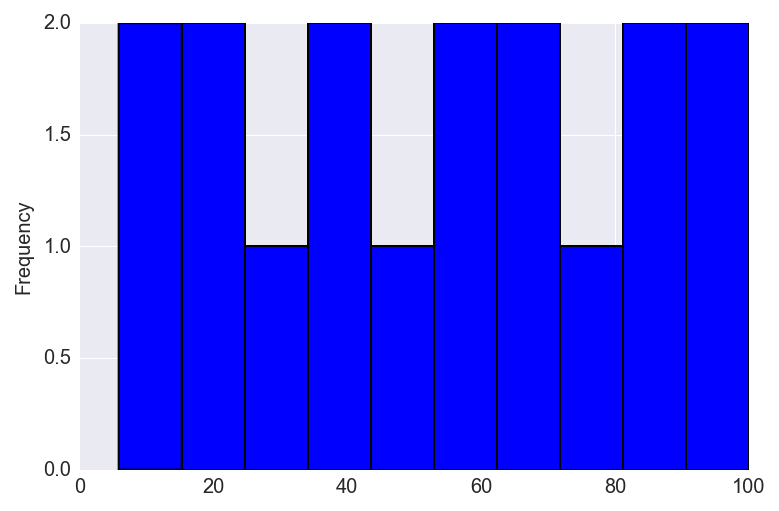

In [67]:
drugs['marijuana-use'].apply(lambda x: stats.percentileofscore(drugs['marijuana-use'],x)).plot.hist()

This is the plot with percentiles. It is converted from a normal distribution plot by converting the individual data points of the variable to a scale from 0 to 100, which is based on the rank of the point in the variable. For example, a point with a score of 75 would mean that 75% of the datapoints are lower than that.